
<span style="font-size:22px;"><b>Sumário</b></span>

1. [Introdução](#Introdução)\
    1.1. [Imports](#Imports)\
    1.2. [Load dataset](#Load-dataset)

2. [Data Cleaning](#Data-Cleaning)\
    2.1. [Alterando os tipos](#Alterando-os-tipos)\
    2.2. [Missing values](#Missing-values)\
    2.3. [Observando os dados faltantes](#Observando-os-dados-faltantes)\
    2.4. [Derived features](#Derived-features)

3. [Descrição dos dados](#Descrição-dos-dados)\
    3.1. [Atributos numéricos](#Atributos-numéricos)\
    3.2. [Atributos categóricos](#Atributos-categóricos)\
    3.3. [Vendas](#Vendas)

# Introdução

## Imports

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

try:
    import missingno as msno
except:
    !pip install missingno
    import missingno as msno
    
from IPython.core.display import HTML
from IPython.display import Image, display
import warnings
warnings.filterwarnings("ignore")

In [569]:
# configurando pandas e matplotlib
%matplotlib inline
%pylab inline

plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [14, 8]
plt.rcParams['font.size'] = 24
plt.rcParams['axes.labelsize'] = 14

display( HTML( '<style>.container { width:100% !important; }</style>') )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option( 'display.expand_frame_repr', False )

sns.set()

Populating the interactive namespace from numpy and matplotlib


## Load dataset

In [570]:
filename = "trabalho2_dados_27.csv"

df = pd.read_csv(filename)
df.columns = df.columns.str.replace("-", "_") #substituindo "-" por "_"

In [571]:
df.sample(3)

,nome,plataforma,genero,editora,vendas,lancamento,avaliacao_criticos,numero_criticos,avaliacao_usuarios,numero_usuarios,fabricante
586,The Shoot,PS3,Shooter,Sony Computer Entertainment,0.30,19-Oct-10,60.0,39.0,6.2,11.0,Cohort Studios
1596,Crazy Chicken Tales,Wii,Action,Conspiracy Entertainment,0.06,12-Jan-10,NaN,NaN,tbd,NaN,Conspiracy Entertainment
1334,Detective Conan: Prelude from the Past,PSP,Action,Namco Bandai Games,0.04,NaN,NaN,NaN,NaN,NaN,NaN


### __Dimensões do dataset__

In [572]:
print("{} instâncias\n{} features".format(*df.shape))

1632 instâncias
11 features


Algumas observações sobre os dados:
- Há dados faltantes (missing data)
- `lancamento` deve ser convertido para datetime
- `avaliacao_usuario` deve ser convertido para float
- `plataforma`, `genero`, `editora` e `fabricante` podem, inicialmente, ser convertidos para category

### __Tipos dos atributos__

In [573]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome                1632 non-null   object 
 1   plataforma          1632 non-null   object 
 2   genero              1632 non-null   object 
 3   editora             1628 non-null   object 
 4   vendas              1632 non-null   float64
 5   lancamento          1122 non-null   object 
 6   avaliacao_criticos  889 non-null    float64
 7   numero_criticos     889 non-null    float64
 8   avaliacao_usuarios  1103 non-null   object 
 9   numero_usuarios     831 non-null    float64
 10  fabricante          1115 non-null   object 
dtypes: float64(4), object(7)
memory usage: 140.4+ KB
None


# Data Cleaning

## Alterando os tipos

Conventendo as datas de lançamentos para datetime. Os dados faltantes serão tratados como np.datetime64('NaT') (NaT = not a time)

In [110]:
# parse dates
df["lancamento"] = pd.to_datetime(df["lancamento"], errors="coerce")

Substituí 272 registros rotulados como "tbd" na coluna `avaliacao_usuarios` por NaN e converti para float
 

In [111]:
df["avaliacao_usuarios"] = df["avaliacao_usuarios"].replace("tbd", np.nan).astype(float)

Convertendo `plataforma`, `genero`, `fabricante` e `editora` para category

In [112]:
cols2cat = ["plataforma", "genero", "editora", "fabricante"]
df[cols2cat] = df[cols2cat].astype("category")

__Atributos com tipos modificados:__

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   nome                1632 non-null   object        
 1   plataforma          1632 non-null   category      
 2   genero              1632 non-null   category      
 3   editora             1628 non-null   category      
 4   vendas              1632 non-null   float64       
 5   lancamento          1107 non-null   datetime64[ns]
 6   avaliacao_criticos  889 non-null    float64       
 7   numero_criticos     889 non-null    float64       
 8   avaliacao_usuarios  831 non-null    float64       
 9   numero_usuarios     831 non-null    float64       
 10  fabricante          1115 non-null   category      
dtypes: category(4), datetime64[ns](1), float64(5), object(1)
memory usage: 129.8+ KB


## Missing values

- `avaliacao_usuarios`, `avaliacao_criticos`, `numero_usuarios` e `numero_criticos` não possuem mais de 45% de seus dados
- `lancamento` e `fabricante` não possuem ~32% de seus dados

In [114]:
missing_count = df.isna().sum()

missing_percent = round(missing_count / len(df) * 100, 2)
missing_df = pd.concat([missing_count, missing_percent], axis=1)
missing_df.rename(columns={0:"Missing values", 1:"% Missing values"}, inplace=True)
missing_df.sort_values(by="Missing values", ascending=False, inplace=True)
only_missing_df = missing_df.query("`Missing values` > 0")

print(f"# de colunas com missing values:", len(only_missing_df))
print()
only_missing_df

# de colunas com missing values: 7



,Missing values,% Missing values
avaliacao_usuarios,801,49.08
numero_usuarios,801,49.08
avaliacao_criticos,743,45.53
numero_criticos,743,45.53
lancamento,525,32.17
fabricante,517,31.68
editora,4,0.25


### __Observando os dados faltantes__

Em geral, quando o registro possui `lancamento` igual a NaN, as outras 5 colunas com maiores quantidades de valores faltantes também são NaN.

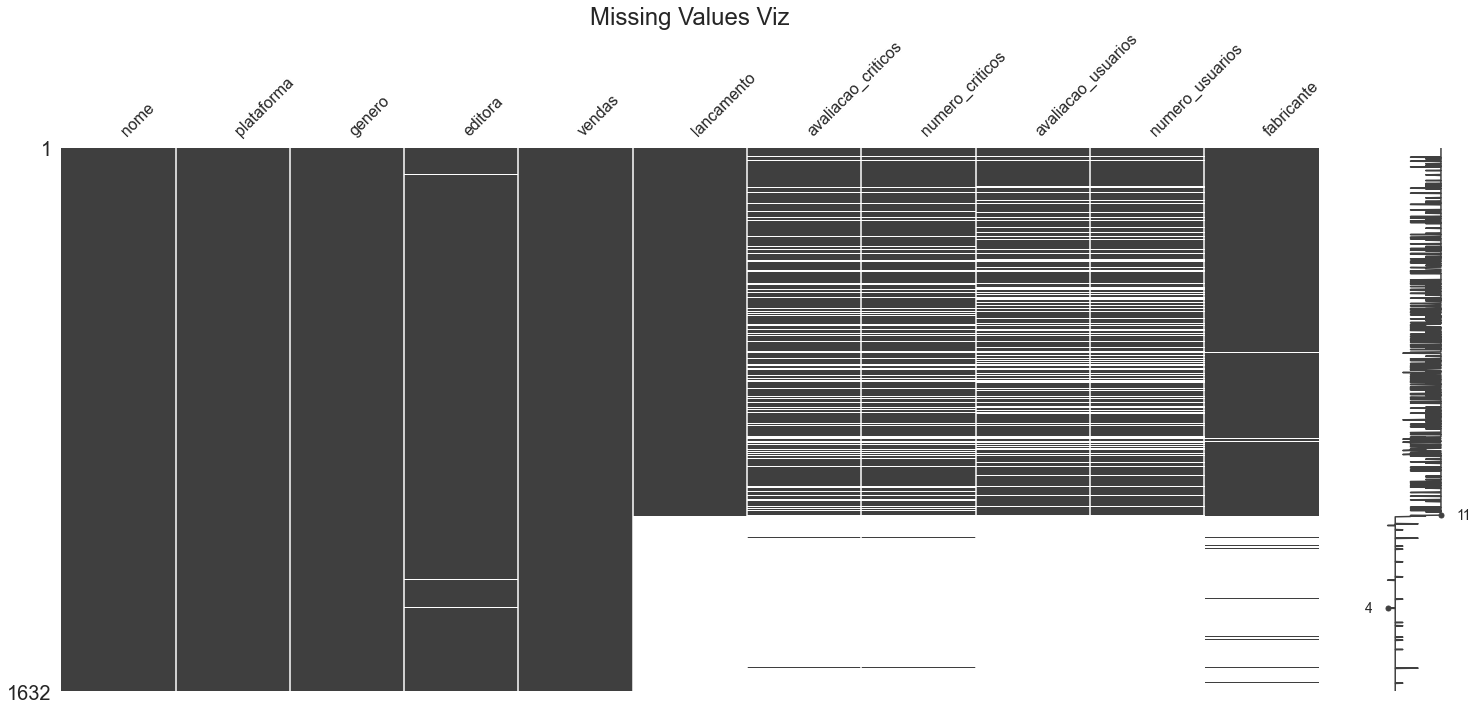

In [116]:
# https://github.com/ResidentMario/missingno
msno.matrix(df.sort_values("lancamento"))
plt.title("Missing Values Viz", fontsize=24);

Algumas possibilidades de tratamento dos valores faltantes:|

- Retirar todas as linhas que possuem algum _missing value_
- Retirar as colunas que possuem muitos dados faltantes
- Utilizar técnicas de Imputation
- Coletar os valores faltantes e inseri-los no dataset, através de web scraping, por exemplo

Algumas referências:
- [How to Handle Missing Data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)

- [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/)

- [7 Ways to Handle Missing Values in Machine Learning](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)

Inicialmente irei optar por excluir todas as linhas que possuem missing values.\
Definitivamete essa __não é__ a melhor opção e deveria ser modificada nos próximos ciclos.\
A melhor estratégia para esse conjunto de dados, em minha opnião, é coletar o máximo possível dos dados faltantes através de web scraping de sites como: [vgchartz](https://www.vgchartz.com) e [metacritic](https://www.metacritic.com/browse/games/release-date/available ) (provavelmente essa é a fonte original desse dataset).

In [129]:
# Drop linhas com missing values
df1 = df.dropna()

In [130]:
df1.isna().sum().sum()

0

\# de linhas após o drop:

In [131]:
df1.shape[0]

786

## Derived features 

__Criando variáveis derivadas do dataset original__

Extraindo ano e mês do lançamento:

In [183]:
df1["mes_lancamento"] = df1.lancamento.dt.month
df1["ano_lancamento"] = df1.lancamento.dt.year

# Descrição dos dados

__Intervalo de datas contidas no dataset:__

In [539]:
# dates range
min_date, max_date = df1["lancamento"].min(), df["lancamento"].max()
print("De {:%d/%m/%Y} até {:%d/%m/%Y}\n\n".format(min_date, max_date))

De 15/03/2005 até 24/06/2014




__Separando os dados em tipos numéricos e categóricos__

In [566]:
num_df = df1.select_dtypes(include=[int, float])
cat_df = df1.select_dtypes(include=["category"])
print(f"Atributos inteiros: {len(num_df.columns)} =>", num_df.columns.to_list())
print(f"Atributos categóricos: {len(cat_df.columns)} =>", cat_df.columns.to_list())


Atributos inteiros: 7 => ['vendas', 'avaliacao_criticos', 'numero_criticos', 'avaliacao_usuarios', 'numero_usuarios', 'mes_lancamento', 'ano_lancamento']
Atributos categóricos: 4 => ['plataforma', 'genero', 'editora', 'fabricante']


## Atributos numéricos 

### __Estatisticas básicas__

In [513]:
print(num_df.describe().T.drop("count", axis=1))

                           mean         std      min       25%     50%      75%      max
vendas                 1.038448    3.526361     0.01     0.160     0.4     0.95    81.84
avaliacao_criticos    69.559796   13.998803    19.00    60.250    72.0    80.00    98.00
numero_criticos       36.049618   21.906549     4.00    18.000    34.0    51.00   105.00
avaliacao_usuarios     6.943130    1.453328     0.70     6.225     7.3     8.00     9.50
numero_usuarios      137.834606  363.252043     4.00    13.000    31.0    95.75  3781.00
mes_lancamento         7.198473    3.412797     1.00     4.000     8.0    10.00    12.00
ano_lancamento      2009.328244    2.144854  2005.00  2008.000  2009.0  2011.00  2014.00


### __Análise univariada__

Algumas observações:
- É possível notar que o atributo vendas possui muitos outliers e que seus valores estão concentrados entre 0.15 e 1;
- As avaliações dos críticos tendem a ser mais conservadoras do que a dos usuários.
- A maior quantidade de lançamentos ocorreram em 2009

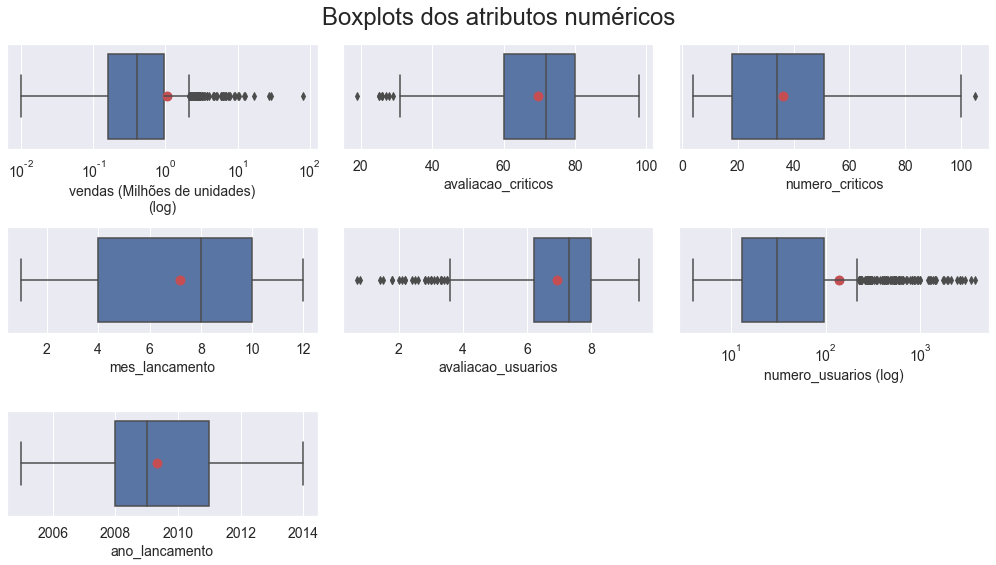

In [350]:
def boxplot(col_name, xlabel=None, mean=True, ax=None, log=False):
    data = num_df.loc[:, col_name]

    ax = sns.boxplot(data, ax=ax)
    ax.tick_params(axis="x", labelsize=14)
    if mean:
        ax.scatter(data.mean(), 0, marker='o', s=80, color="r")
    if log:
        ax.set(xscale="log")
    
    if xlabel is not None:
        ax.set(xlabel=xlabel)
    
fig, axs = plt.subplots(3,3)    

boxplot("vendas", xlabel="vendas (Milhões de unidades)\n(log)", ax=axs[0,0], log=True)
boxplot("avaliacao_criticos", ax=axs[0,1])
boxplot("numero_criticos", ax=axs[0,2])

boxplot("mes_lancamento", ax=axs[1,0])
boxplot("avaliacao_usuarios", ax=axs[1,1])
boxplot("numero_usuarios", xlabel="numero_usuarios (log)", ax=axs[1,2], log=True)

boxplot("ano_lancamento", ax=axs[2,0])


fig.delaxes(axs[2,1])
fig.delaxes(axs[2,2])

fig.suptitle("Boxplots dos atributos numéricos", fontsize=24)
fig.tight_layout()
plt.show()

### __Análise multivariada__

__Scatter plot__

- O mês preferido para lançamentos é outubro

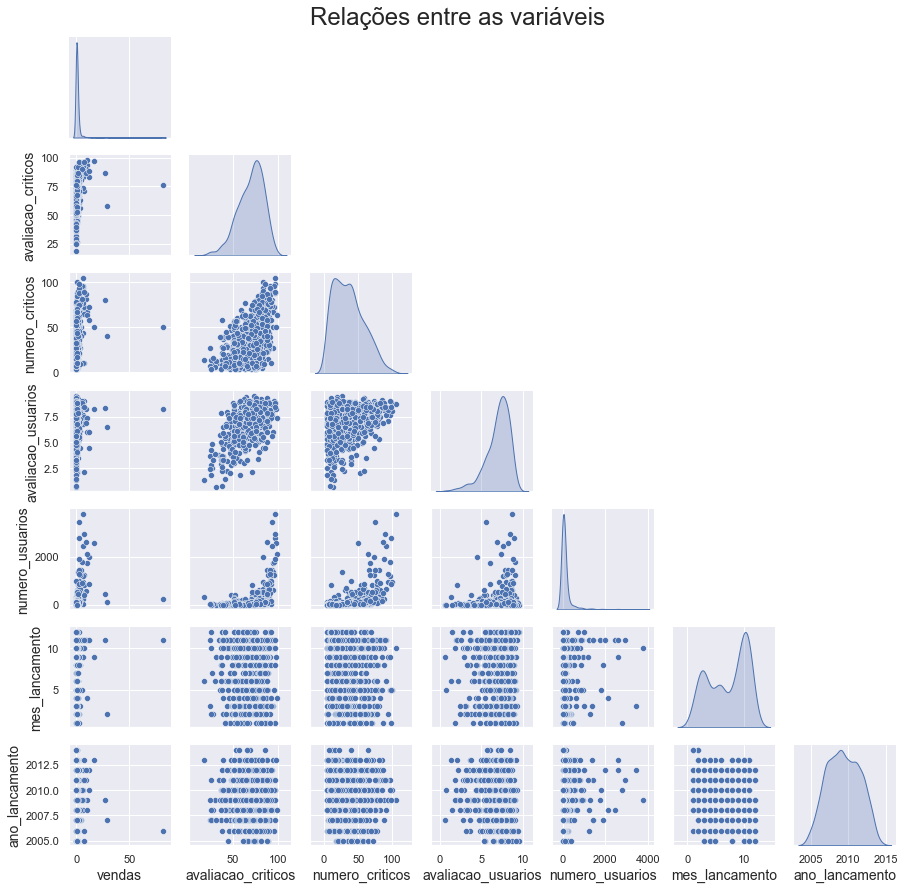

In [376]:
sns.pairplot(num_df, diag_kind='kde', height=1.8, corner=True)
plt.suptitle("Relações entre as variáveis", fontsize=24)
plt.tight_layout()
plt.show()

</br>
</br>

__Matriz de correlação__

- As avaliações dos usuários e críticos possuem uma correlação positiva razoável

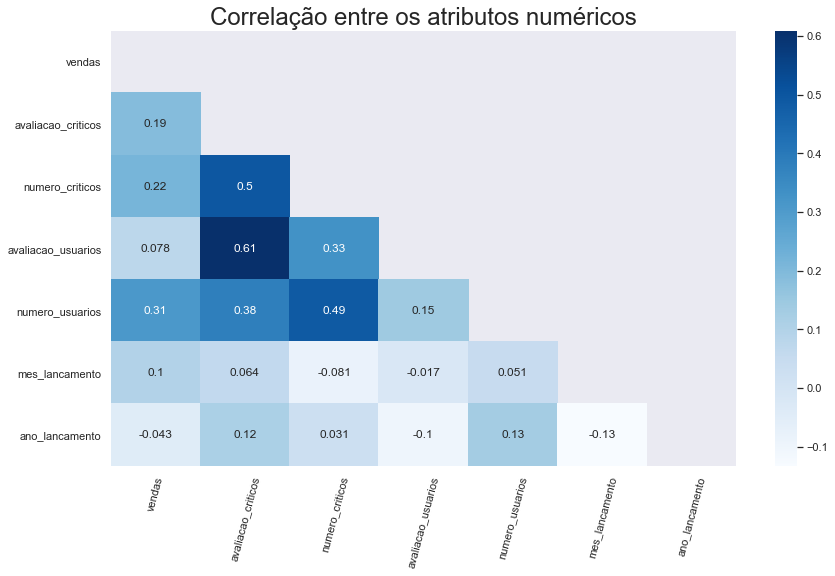

In [360]:
corr = num_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask, cmap="Blues")
plt.title("Correlação entre os atributos numéricos", fontsize=24)
plt.xticks(rotation=75)
plt.show()

## Atributos categóricos

### __Descrição básica dos dados categóricos__

In [535]:
cat_df.describe().drop("count", axis=0)

,plataforma,genero,editora,fabricante
unique,9,12,73,368
top,X360,Action,Electronic Arts,EA Canada
freq,249,191,121,29


In [449]:
def countplot(col_name, title=None, order=True, top=None):
    top_ordered = cat_df[col_name].value_counts()[:top]
    ax = sns.countplot(cat_df[col_name], order=top_ordered.index)

    for bar in ax.patches:
        x = bar.get_x() + bar.get_width() / 2
        height = bar.get_height()
        ax.text(x, height, f"{height}\n({height/len(cat_df):.2%})", ha='center', va='bottom', fontsize=15)
    
    plt.title(title, fontsize=24)    
    plt.ylim(0, plt.ylim()[1]+10)
    plt.tight_layout()
    return plt

### __Quantidade de lançamentos por plataforma__

- ~60% do total de lançamentos foram de games do Xbox 360 e do PS3
- PS4 e Xbox One foram lançados no final de 2013, por esse motivo possuem poucos lançamentos  registrados no dataset

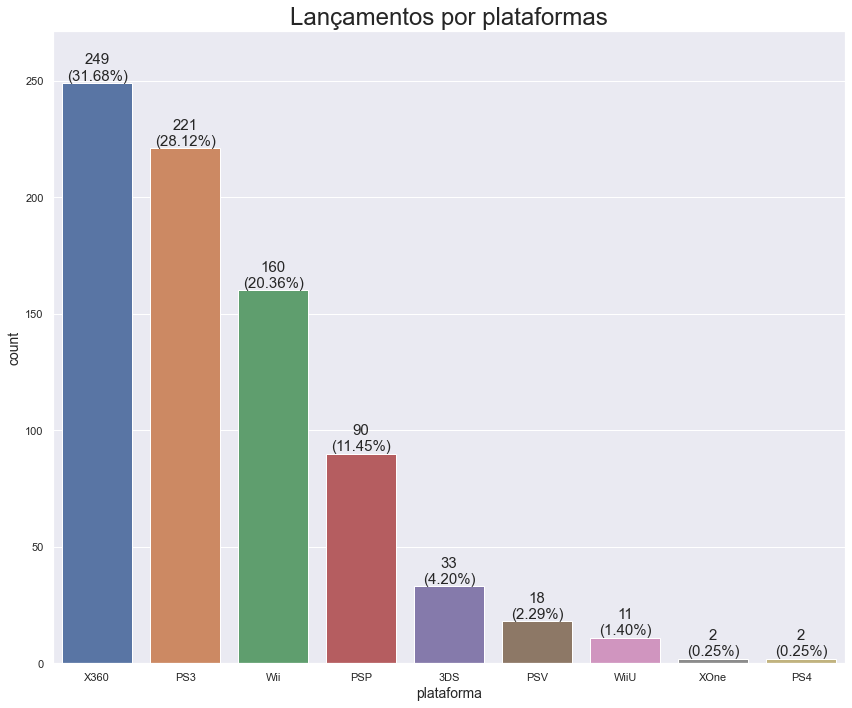

In [534]:
countplot("plataforma", title="Lançamentos por plataformas").show()

### __Quantidade de lançamentos por gênero__

- Os gêneros mais lançados são de ação, esportes e jogos de tiro
- Puzzle e estratégia possuem poucos lançamentos

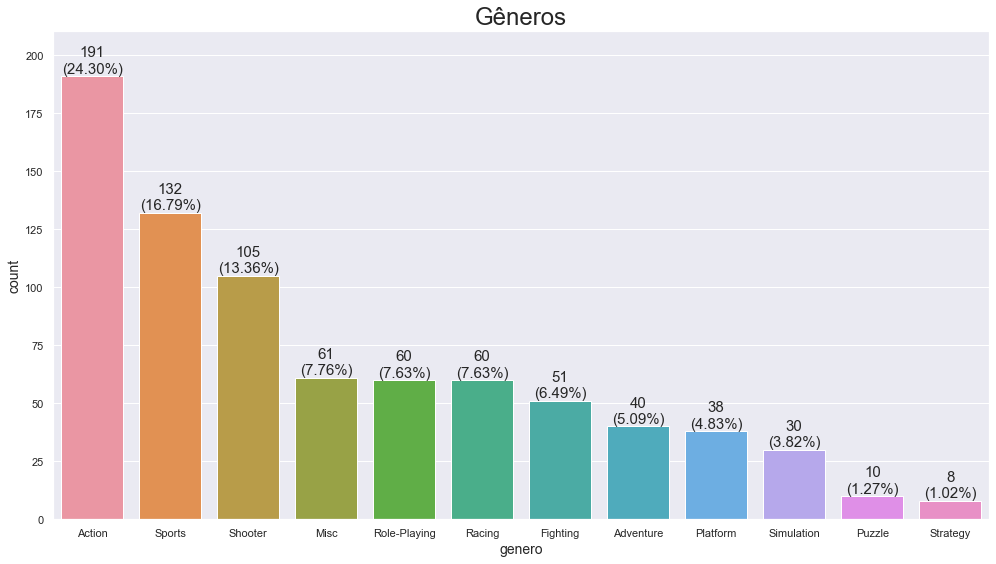

In [451]:
countplot("genero", title="Gêneros").show()

### __Quantidade de lançamentos por editora__

- A editora EA lidera o ranking de lançamentos, seguido por Ubisoft, Activision e sony. Juntas essas editoras possuem ~ 39% do total de lançamentos

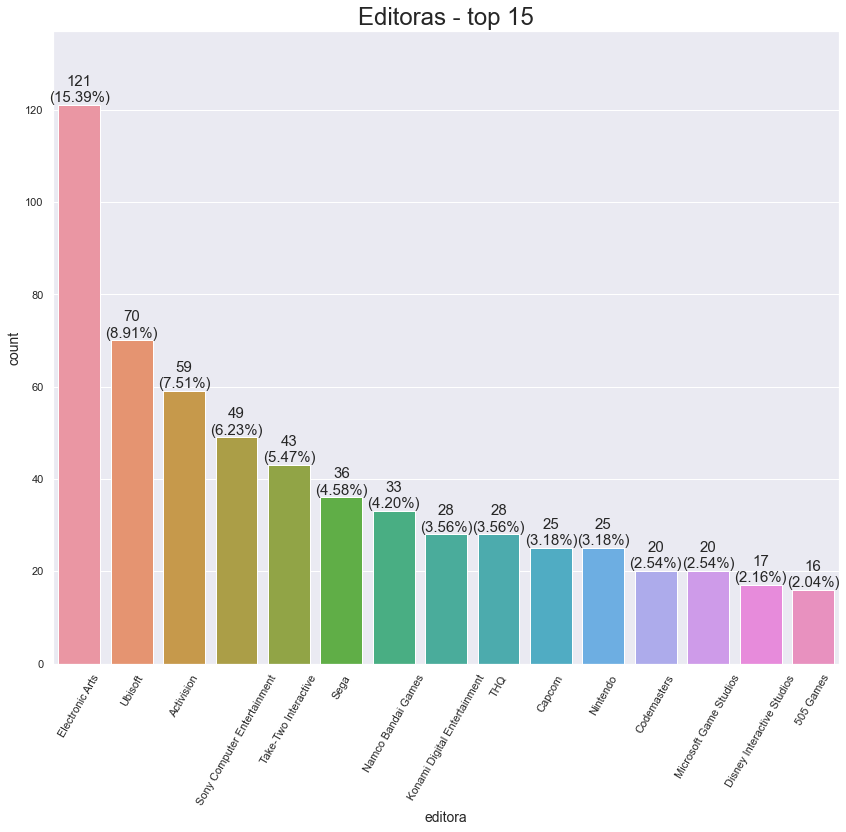

In [560]:
countplot("editora", title="Editoras - top 15", top=15)
plt.xticks(rotation=60)
plt.show()

### __Quantidade de lançamentos por fabricante__

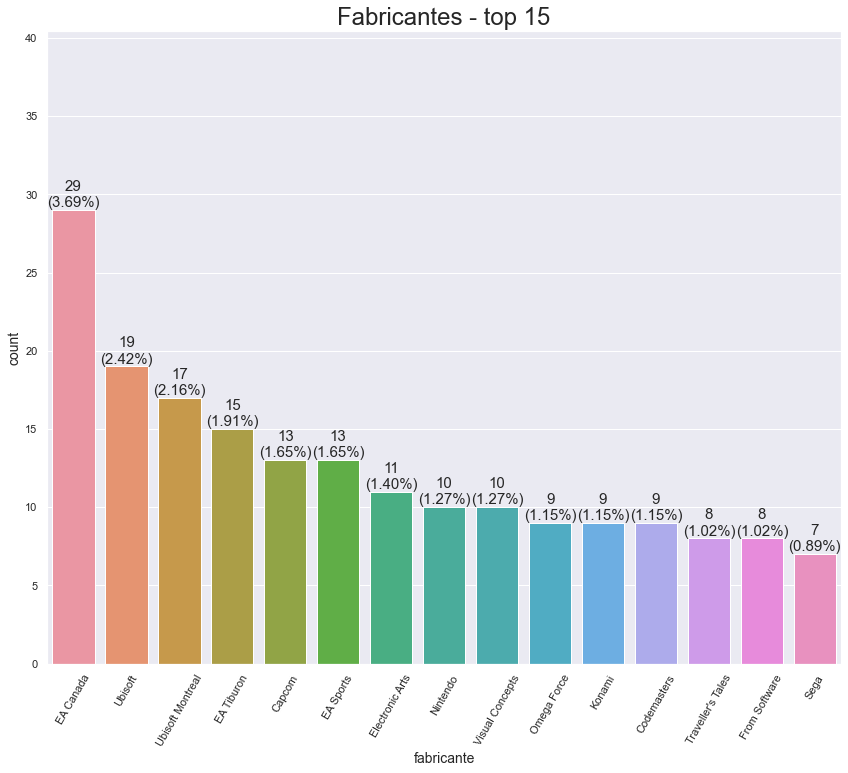

In [559]:
countplot("fabricante", title="Fabricantes - top 15", top=15)
plt.xticks(rotation=60)
plt.show()

## Vendas

### __Total de vendas por plataforma__

- Nintendo Wii, PS3 e XBox 360 foram responsáveis por ~90% das vendas dos games contidos nesse dataset

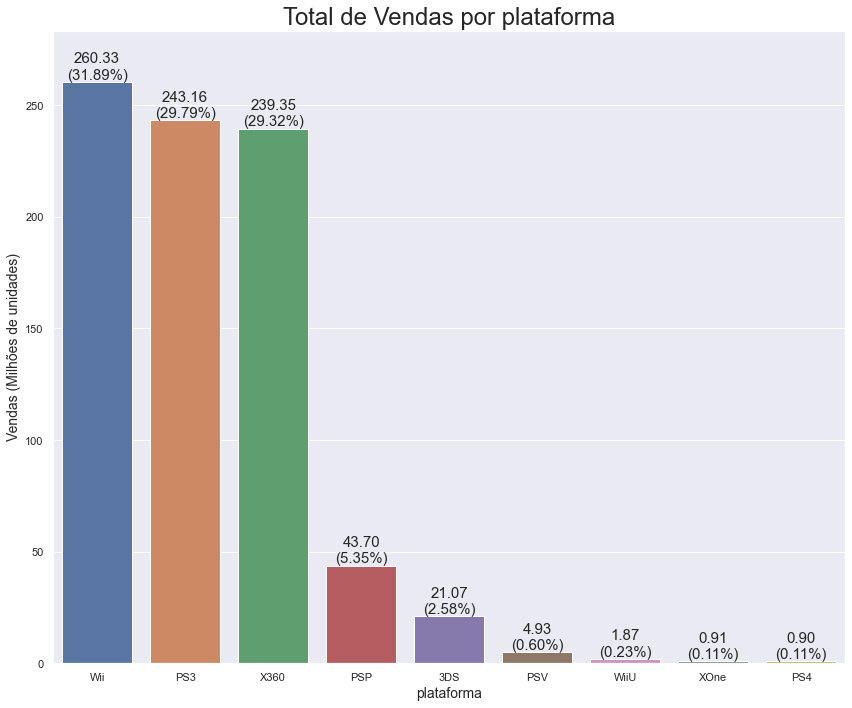

In [557]:
# total vendas por plataforma
total_vendas = df1[["vendas", "plataforma"]].groupby("plataforma").sum()
vendas_por_plataforma = total_vendas.sort_values("vendas", ascending=False)

# vendas_por_plataforma
ax = sns.barplot(data=vendas_por_plataforma.reset_index(), x="plataforma", y="vendas", order=vendas_por_plataforma.index)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    ax.text(x, height, f"{height:.2f}\n({(height/total_vendas.sum().values[0])*100:.2f}%)", ha='center', va='bottom', fontsize=15)

   
plt.title("Total de Vendas por plataforma", fontsize=24)
plt.ylabel("Vendas (Milhões de unidades)")
plt.ylim(0, plt.ylim()[1]+10)
plt.tight_layout()
plt.show()

### __Jogos mais vendidos__

- Wii sports vendeu mais de 81 milhões de unidades, seguido por Wii play com ~29 milhões e New Super Mario Bros com mais de 27 milhões
- Em 4º lugar GTA V para PS3 com 16,7 milhões de unidades vendidas

In [540]:
df[["vendas", "nome", "plataforma"]].nlargest(10, columns=["vendas"])

,vendas,nome,plataforma
374,81.84,Wii Sports,Wii
143,28.79,Wii Play,Wii
561,27.25,New Super Mario Bros. Wii,Wii
872,16.71,Grand Theft Auto V,PS3
272,12.57,Call of Duty: Black Ops II,X360
1588,12.08,Call of Duty: Black Ops,PS3
216,10.31,Call of Duty: Modern Warfare 2,PS3
1256,10.05,Grand Theft Auto IV,PS3
294,9.28,Super Mario 3D Land,3DS
1320,8.94,Halo 4,X360


### __Vendas durante os anos__

- 2009 foi o ano com maior quantidade de unidades vendidas
- o ano de 2014 está incompleto no dataset, logo não deve ser considerado para fins de comparação

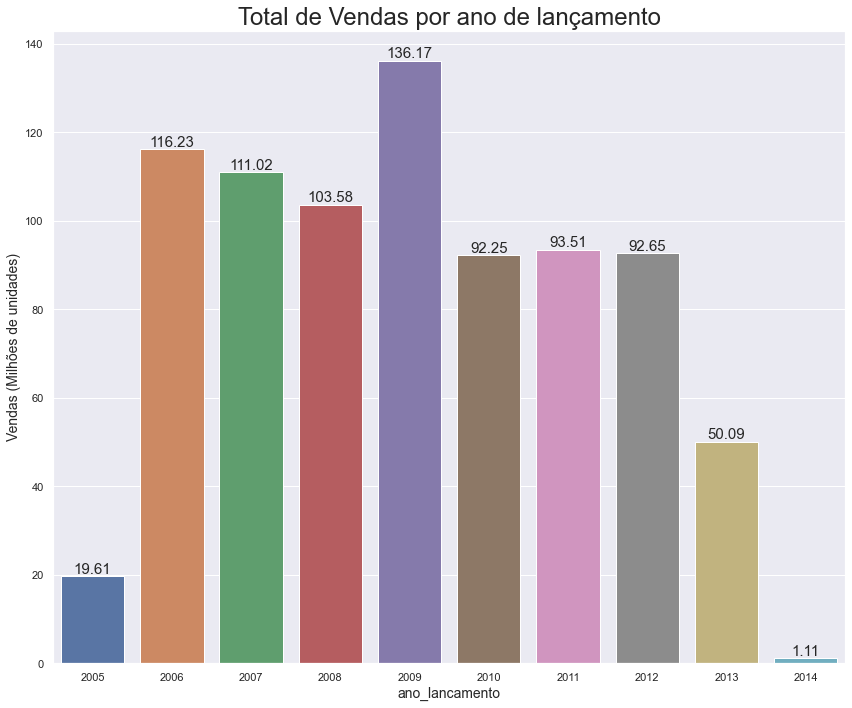

In [561]:
ax = sns.barplot(data=num_df.groupby("ano_lancamento", as_index=False).sum(), x="ano_lancamento", y="vendas")

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    ax.text(x, height, f"{height:.2f}", ha='center', va='bottom', fontsize=15)
   
plt.title("Total de Vendas por ano de lançamento", fontsize=24)
plt.ylabel("Vendas (Milhões de unidades)")
plt.tight_layout()
plt.show()